In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dt = np.dtype([('instance_no', int),
               ('exp_no', int),
               ('method', int), # 1 = white box, 2 = euclidean_PCA, 3 = hog, 4 = euclidean_PCA category, 5 = hog category, 6 = ais
               ('pca_n', int),
               ('percentage_of_data', float),
               ('percentile', float),
               ('mc_euclidean_no_batches', int), # stuff
               ('mc_hog_no_batches', int), # stuff
               ('sigma_ais', float),
               ('mc_attack_log', float),
               ('mc_attack_eps', float),
               ('mc_attack_frac', float), 
               ('mc_attack_log_50', float), 
               ('mc_attack_eps_50', float),
               ('mc_attack_frac_50', float),
               ('white_box_50', float),
               ('white_box_11', float),
               ('ais_50', float),
               ('ais_acc_rate_50', float)
              ])

In [2]:
data = pd.DataFrame(np.loadtxt('MC_ATTACK_CVAE.csv', dtype=dt))

data = data.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
data = data.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)
data = data.assign(mem_inf_adv_wb = lambda x: (x.white_box_50-0.5)*2)
data = data.assign(mem_inf_adv_ais = lambda x: (x.ais_50-0.5)*2)

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0:
            prob[i] = 1
        elif x[i] == 0:
            prob[i] = 0.5
        elif x[i] < 0:
            prob[i] = 0
    return prob

data = data.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
data = data.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))
data = data.assign(set_accuracy_wb = lambda x: convert_to_set_prob(x.mem_inf_adv_wb))
data = data.assign(set_accuracy_ais = lambda x: convert_to_set_prob(x.mem_inf_adv_ais))

data = data.assign(set_mem_inf_adv_mc_log = lambda x: 2*x.set_accuracy_mc_log-1)
data = data.assign(set_mem_inf_adv_mc_ones = lambda x: 2*x.set_accuracy_mc_ones-1)
data = data.assign(set_mem_inf_adv_wb = lambda x: 2*x.set_accuracy_wb-1)
data = data.assign(set_mem_inf_adv_ais = lambda x: 2*x.set_accuracy_ais-1)

white_box = data[data.method == 1]
pca_cat = data[data.method == 4]
hog_cat = data[data.method == 5]
ais = data[data.method == 6]


rec_attack = data[data.method == 42]

In [3]:
pca_perc_40 = pd.DataFrame(np.loadtxt('TD40.csv', dtype=dt))

pca_perc_40 = pca_perc_40.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
pca_perc_40 = pca_perc_40.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0:
            prob[i] = 1
        elif x[i] == 0:
            prob[i] = 0.5
        elif x[i] < 0:
            prob[i] = 0
    return prob

pca_perc_40 = pca_perc_40.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
pca_perc_40 = pca_perc_40.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))

In [4]:
pca_perc_20 = pd.DataFrame(np.loadtxt('TD5.csv', dtype=dt))

pca_perc_20 = pca_perc_20.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
pca_perc_20 = pca_perc_20.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0:
            prob[i] = 1
        elif x[i] == 0:
            prob[i] = 0.5
        elif x[i] < 0:
            prob[i] = 0
    return prob

pca_perc_20 = pca_perc_20.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
pca_perc_20 = pca_perc_20.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))

In [5]:
rec_perc_40 = pd.DataFrame(np.loadtxt('Rec_TD_40.csv', dtype=dt))

rec_perc_40 = rec_perc_40.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
rec_perc_40 = rec_perc_40.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)

rec_perc_40 = rec_perc_40.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
rec_perc_40 = rec_perc_40.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))

In [6]:
rec_perc_20 = pd.DataFrame(np.loadtxt('Rec_TD_20.csv', dtype=dt))

rec_perc_20 = rec_perc_20.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
rec_perc_20 = rec_perc_20.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)

rec_perc_20 = rec_perc_20.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
rec_perc_20 = rec_perc_20.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))

In [7]:
pca_perc_dropout = pd.DataFrame(np.loadtxt('Dropout70.csv', dtype=dt))

pca_perc_dropout = pca_perc_dropout.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
pca_perc_dropout = pca_perc_dropout.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)

pca_perc_dropout = pca_perc_dropout.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
pca_perc_dropout = pca_perc_dropout.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))

In [8]:
pca_perc_dropout_50 = pd.DataFrame(np.loadtxt('Dropout50.csv', dtype=dt))

pca_perc_dropout_50 = pca_perc_dropout_50.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
pca_perc_dropout_50 = pca_perc_dropout_50.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)

pca_perc_dropout_50 = pca_perc_dropout_50.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
pca_perc_dropout_50 = pca_perc_dropout_50.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))

In [9]:
rec_perc_dropout = pd.DataFrame(np.loadtxt('Rec_Dropout70.csv', dtype=dt))

rec_perc_dropout = rec_perc_dropout.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
rec_perc_dropout = rec_perc_dropout.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)

rec_perc_dropout = rec_perc_dropout.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
rec_perc_dropout = rec_perc_dropout.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))

In [10]:
rec_perc_dropout_50 = pd.DataFrame(np.loadtxt('Rec_Dropout50.csv', dtype=dt))

rec_perc_dropout_50 = rec_perc_dropout_50.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
rec_perc_dropout_50 = rec_perc_dropout_50.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)

rec_perc_dropout_50 = rec_perc_dropout_50.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
rec_perc_dropout_50 = rec_perc_dropout_50.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))

In [11]:
bb = pd.DataFrame(np.loadtxt('BB_Attack_Epoch3.csv', dtype=dt))

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0.5:
            prob[i] = 1
        elif x[i] == 0.5:
            prob[i] = 0.5
        elif x[i] < 0.5:
            prob[i] = 0
    return prob

bb = bb.assign(set_accuracy_bb = lambda x: convert_to_set_prob(x.white_box_50))

In [12]:
dt = np.dtype([('instance_no', int),
               ('exp_no', int),
               ('method', int), # 1 = white box, 2 = euclidean_PCA, 3 = hog, 4 = euclidean_PCA category, 5 = hog category, 6 = ais
               ('pca_n', int),
               ('percentage_of_data', float),
               ('percentile', float),
               ('mc_euclidean_no_batches', int), # stuff
               ('mc_hog_no_batches', int), # stuff
               ('sigma_ais', float),
               ('mc_attack_log', float),
               ('mc_attack_eps', float),
               ('mc_attack_frac', float), 
               ('mc_attack_log_50', float), 
               ('mc_attack_eps_50', float),
               ('mc_attack_frac_50', float),
               ('white_box_50', float),
               ('white_box_11', float),
               ('ais_50', float),
               ('ais_acc_rate_50', float),
               ('successfull_set_attack_1', float),
               ('successfull_set_attack_2', float),
               ('successfull_set_attack_3', float)
              ])

In [13]:
ais = pd.DataFrame(np.loadtxt('AIS_SIGMA_0.025.csv', dtype=dt))

# sign correction
ais.ais_50=1-ais.ais_50

ais = ais.assign(set_accuracy_ais = lambda x: convert_to_set_prob(x.ais_50))

# Black Box after 3 Epochs

In [14]:
len(bb)

10973

In [15]:
print(bb.white_box_50.mean())
print(bb.set_accuracy_bb.mean())

0.5074127403627084
0.5102068714116468


# AIS

In [16]:
print(len(ais))

275


In [17]:
ais.set_accuracy_ais.mean()

0.5709090909090909

# Reconstruction Attack


In [18]:
print(len(rec_attack))

100


In [19]:
print(rec_attack.mc_attack_eps_50.mean())
print(rec_attack.set_accuracy_mc_ones.mean())

0.7008999999999999
1.0


# PCA per Category
0.1 mc_attack_log_50

In [20]:
pca_cat.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50']]*100

,mc_attack_log_50,mc_attack_eps_50
percentile,,
-1.000,59.930,59.930
0.001,50.595,50.280
0.010,51.015,50.880
0.100,56.490,56.370
1.000,56.115,55.205


In [21]:
means_pca_gan = pca_cat.groupby(['percentile']).mean()[['set_accuracy_mc_log','set_accuracy_mc_ones']]*100
means_pca_gan

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.000,99.75,99.75
0.001,56.75,52.25
0.010,60.75,58.50
0.100,94.75,95.50
1.000,95.50,91.75


In [22]:
std_pca_gan = pca_cat.groupby(['percentile']).std()[['set_accuracy_mc_log','set_accuracy_mc_ones']]/np.sqrt(pca_cat.groupby(['percentile']).count()[['set_accuracy_mc_log','set_accuracy_mc_ones']])*100
std_pca_gan

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.000,0.250000,0.250000
0.001,3.299869,3.254249
0.010,3.207198,3.289048
0.100,1.520278,1.426156
1.000,1.335164,1.799550


In [23]:
means_pca_gan['set_accuracy_mc_log'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_pca_gan['set_accuracy_mc_log'].map(lambda x: "{:.2f}".format(x)) + ' & '+means_pca_gan['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_pca_gan['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'\\\\'

percentile
-1.000    99.75$\pm$0.25 & 99.75$\pm$0.25\\
 0.001    56.75$\pm$3.30 & 52.25$\pm$3.25\\
 0.010    60.75$\pm$3.21 & 58.50$\pm$3.29\\
 0.100    94.75$\pm$1.52 & 95.50$\pm$1.43\\
 1.000    95.50$\pm$1.34 & 91.75$\pm$1.80\\
dtype: object

In [24]:
pca_cat.groupby(['percentile']).count()[['set_accuracy_mc_log','set_accuracy_mc_ones']]

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.000,200,200
0.001,200,200
0.010,200,200
0.100,200,200
1.000,200,200


In [25]:
pca_cat_opt_perc = pca_cat[pca_cat.percentile == -1]

print(pca_cat_opt_perc.mem_inf_adv_mc_log.mean())
print(pca_cat_opt_perc.mem_inf_adv_mc_ones.mean())

print(pca_cat_opt_perc.set_accuracy_mc_log.mean())
print(pca_cat_opt_perc.set_accuracy_mc_ones.mean())

#print(len(pca_opt_perc[pca_opt_perc.mc_attack_log_50>0.5])/len(pca_opt_perc))
#print(len(pca_opt_perc[pca_opt_perc.mc_attack_eps_50>0.5])/len(pca_opt_perc))

0.1986
0.1986
0.9975
0.9975


# Histogram of Gradients (HOG) per category
0.01 Epsilon Method?

In [26]:
hog_cat = hog_cat[hog_cat.percentile != 0.001]

In [27]:
hog_cat.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50']]*100

,mc_attack_log_50,mc_attack_eps_50
percentile,,
-1.00,53.120,53.120
0.01,52.985,52.950
0.10,52.130,51.885
1.00,51.080,50.645


In [28]:
means_hog_gan = hog_cat.groupby(['percentile']).mean()[['set_accuracy_mc_log','set_accuracy_mc_ones']]*100
means_hog_gan

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,83.5,83.50
0.01,81.0,82.25
0.10,74.5,71.75
1.00,59.5,54.00


In [29]:
std_hog_gan = hog_cat.groupby(['percentile']).std()[['set_accuracy_mc_log','set_accuracy_mc_ones']]/np.sqrt(hog_cat.groupby(['percentile']).count()[['set_accuracy_mc_log','set_accuracy_mc_ones']])*100
std_hog_gan

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,2.432764,2.432764
0.01,2.593963,2.503703
0.10,2.901005,2.977670
1.00,3.236685,3.293819


In [30]:
means_hog_gan['set_accuracy_mc_log'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_hog_gan['set_accuracy_mc_log'].map(lambda x: "{:.2f}".format(x)) + ' & '+means_hog_gan['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_hog_gan['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'\\\\'

percentile
-1.00    83.50$\pm$2.43 & 83.50$\pm$2.43\\
 0.01    81.00$\pm$2.59 & 82.25$\pm$2.50\\
 0.10    74.50$\pm$2.90 & 71.75$\pm$2.98\\
 1.00    59.50$\pm$3.24 & 54.00$\pm$3.29\\
dtype: object

In [31]:
means_hog_gan

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,83.5,83.50
0.01,81.0,82.25
0.10,74.5,71.75
1.00,59.5,54.00


In [32]:
hog_cat.groupby(['percentile']).count()[['set_accuracy_mc_log','set_accuracy_mc_ones']]

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,200,200
0.01,200,200
0.10,200,200
1.00,200,200


In [33]:
hog_cat_opt_perc = hog_cat[hog_cat.percentile == -1]

print(hog_cat_opt_perc.mem_inf_adv_mc_log.mean())
print(hog_cat_opt_perc.mem_inf_adv_mc_ones.mean())

#pca_cat_opt_perc.set_accuracy_mc_log.mean()
print(hog_cat_opt_perc.set_accuracy_mc_log.mean())
print(hog_cat_opt_perc.set_accuracy_mc_ones.mean())

0.06240000000000002
0.06240000000000002
0.835
0.835


In [34]:
def calc_error(data):
    return data.std()/np.sqrt(len(data))

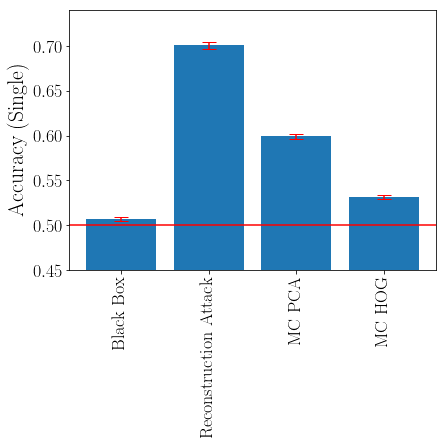

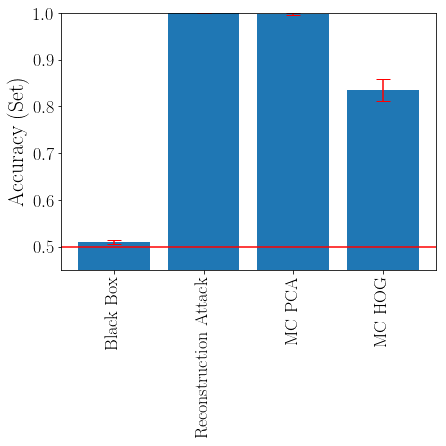

In [35]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 18})

#fig, ax = plt.figure(figsize=(14, 8))
#ax = plt.subplot()
f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

names = ['Black Box', 'Reconstruction Attack','MC PCA', 'MC HOG']
N = len(names)
ind = np.arange(N)

y = [bb.white_box_50.mean(), 
                               rec_attack.mc_attack_eps_50.mean(), 
                               #pca_opt_perc.mc_attack_log_50.mean(),
                               #pca_opt_perc.mc_attack_eps_50.mean(),
                               #hog_opt_perc.mc_attack_log_50.mean(),
                               #hog_opt_perc.mc_attack_eps_50.mean(),
                               #pca_cat_opt_perc.mc_attack_log_50.mean(),
                               pca_cat_opt_perc.mc_attack_eps_50.mean(),
                               #hog_cat_opt_perc.mc_attack_log_50.mean(),
                               hog_cat_opt_perc.mc_attack_eps_50.mean()]

rects1 = ax.bar(ind,  y)

e = [calc_error(bb.white_box_50), 
                               calc_error(rec_attack.mc_attack_eps_50), 
                               #calc_error(pca_opt_perc.mc_attack_log_50), 
                               #calc_error(pca_opt_perc.mc_attack_eps_50), 
                               #calc_error(hog_opt_perc.mc_attack_log_50), 
                               #calc_error(hog_opt_perc.mc_attack_eps_50),
                               #calc_error(pca_cat_opt_perc.mc_attack_log_50), 
                               calc_error(pca_cat_opt_perc.mc_attack_eps_50), 
                               #calc_error(hog_cat_opt_perc.mc_attack_log_50), 
                               calc_error(hog_cat_opt_perc.mc_attack_eps_50)]

np.save('y_single_cvae',y)
np.save('e_single_cvae',e)

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)


plt.ylim(ymin=0.45)
plt.axhline(y=0.5, color='r', linestyle='-')

plt.ylabel('Accuracy (Single)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='90')

ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('VAE_MNIST_Single.pgf', bbox_inches="tight")

#ax = plt.subplot()#, sharey=ax)
f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

ind = np.arange(N)

y = [bb.set_accuracy_bb.mean(), 
                               rec_attack.set_accuracy_mc_ones.mean(), 
                               #pca_opt_perc.set_accuracy_mc_log.mean(),
                               #pca_opt_perc.set_accuracy_mc_ones.mean(),
                               #hog_opt_perc.set_accuracy_mc_log.mean(),
                               #hog_opt_perc.set_accuracy_mc_ones.mean(),
                               #pca_cat_opt_perc.set_accuracy_mc_log.mean(),
                               pca_cat_opt_perc.set_accuracy_mc_ones.mean(),
                               #hog_cat_opt_perc.set_accuracy_mc_log.mean(),
                               hog_cat_opt_perc.set_accuracy_mc_ones.mean()]
rects1 = ax.bar(ind, y)

e = [calc_error(bb.set_accuracy_bb), 
                               calc_error(rec_attack.set_accuracy_mc_ones), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_log), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_ones), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_log), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_ones),
                               #calc_error(pca_cat_opt_perc.set_accuracy_mc_log), 
                               calc_error(pca_cat_opt_perc.set_accuracy_mc_ones), 
                               #calc_error(hog_cat_opt_perc.set_accuracy_mc_log), 
                               calc_error(hog_cat_opt_perc.set_accuracy_mc_ones)]

np.save('y_set_cvae',y)
np.save('e_set_cvae',e)

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)

plt.ylabel('Accuracy (Set)', fontsize='large')

plt.ylim(ymin=0.45, ymax=1.0)
plt.axhline(y=0.5, color='r', linestyle='-')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='90')
ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('VAE_MNIST_Set.pgf', bbox_inches="tight")
    
plt.show()

# Training Data Size

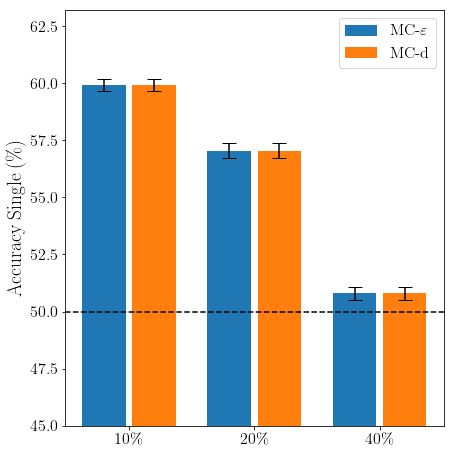

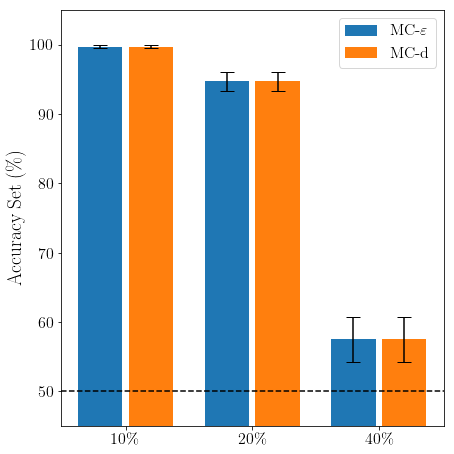

In [36]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16})

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

names = ['10\%', '20\%', '40\%']
N = len(names)
ind = np.arange(N)

pca_perc_40_opt = pca_perc_40[pca_perc_40.percentile == -1]*100
pca_perc_20_opt = pca_perc_20[pca_perc_20.percentile == -1]*100
pca_cat_opt_perc_td = pca_cat_opt_perc*100

offset = 0.2
width = 0.35

y = [pca_cat_opt_perc_td.mc_attack_eps_50.mean(), 
     pca_perc_20_opt.mc_attack_eps_50.mean(), 
     pca_perc_40_opt.mc_attack_eps_50.mean()]

rects1 = ax.bar(ind-offset,  y, width=width, label='MC-$\\varepsilon$')

e = [calc_error(pca_cat_opt_perc_td.mc_attack_eps_50),
     calc_error(pca_perc_20_opt.mc_attack_eps_50),
     calc_error(pca_perc_40_opt.mc_attack_eps_50)]

plt.errorbar(ind-offset, y, e, color='k', linestyle='None', capsize=7)

y = [pca_cat_opt_perc_td.mc_attack_log_50.mean(), 
     pca_perc_20_opt.mc_attack_log_50.mean(), 
     pca_perc_40_opt.mc_attack_log_50.mean()]

rects1 = ax.bar(ind+offset,  y, width=width, label='MC-d')

e = [calc_error(pca_cat_opt_perc_td.mc_attack_log_50),
     calc_error(pca_perc_20_opt.mc_attack_log_50),
     calc_error(pca_perc_40_opt.mc_attack_log_50)]

plt.errorbar(ind+offset, y, e, color='k', linestyle='None', capsize=7)

plt.ylim(ymin=45)
plt.axhline(y=50, color='k', linestyle='--')

plt.ylabel('Accuracy Single (\%)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='0')

ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('VAE_Training_Data_Size_Single.pgf', bbox_inches="tight")

plt.legend()
plt.show()

#####################################################################################
f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

N = len(names)
ind = np.arange(N)

offset = 0.2
width = 0.35

y = [pca_cat_opt_perc_td.set_accuracy_mc_ones.mean(), 
     pca_perc_20_opt.set_accuracy_mc_ones.mean(), 
     pca_perc_40_opt.set_accuracy_mc_ones.mean()]

rects1 = ax.bar(ind-offset,  y, width=width, label='MC-$\\varepsilon$')

e = [calc_error(pca_cat_opt_perc_td.set_accuracy_mc_ones),
     calc_error(pca_perc_20_opt.set_accuracy_mc_ones),
     calc_error(pca_perc_40_opt.set_accuracy_mc_ones)]

plt.errorbar(ind-offset, y, e, color='k', linestyle='None', capsize=7)

y = [pca_cat_opt_perc_td.set_accuracy_mc_log.mean(), 
     pca_perc_20_opt.set_accuracy_mc_log.mean(), 
     pca_perc_40_opt.set_accuracy_mc_log.mean()]

rects1 = ax.bar(ind+offset,  y, width=width, label='MC-d')

e = [calc_error(pca_cat_opt_perc_td.set_accuracy_mc_log),
     calc_error(pca_perc_20_opt.set_accuracy_mc_log),
     calc_error(pca_perc_40_opt.set_accuracy_mc_log)]

plt.errorbar(ind+offset, y, e, color='k', linestyle='None', capsize=7)

plt.ylim(ymin=45)
plt.axhline(y=50, color='k', linestyle='--')

plt.ylabel('Accuracy Set (\%)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='0')

ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('VAE_Training_Data_Size_Set.pgf', bbox_inches="tight")

plt.legend()
plt.show()

In [37]:
pca_perc_20_opt.set_accuracy_mc_log.mean()

94.75

In [38]:
def calc_means_std(col_names, dataset, crit):
    dataset = dataset.groupby([crit])
    means = dataset.mean()[col_names]
    std = dataset.std()[col_names]
    lens = np.sqrt(dataset.count()[col_names])
    return means, std/ lens

rec_attack_plot = rec_attack.assign(tds = 0.1)
rec_perc_20 = rec_perc_20.assign(tds = 0.2)
rec_perc_40 = rec_perc_40.assign(tds = 0.4)
merged = pd.concat((rec_attack_plot, rec_perc_20, rec_perc_40))*100

means_single, std_single = calc_means_std(['mc_attack_eps_50'], merged, 'tds')
means_set, std_set = calc_means_std(['set_accuracy_mc_ones'], merged, 'tds')

res = means_single['mc_attack_eps_50'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_single['mc_attack_eps_50'].map(lambda x: "{:.2f}".format(x)) + ' & '+means_set['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_set['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x)) + '\\\\'
for i in range(len(res.values)):
    print(res.values[i])

70.09$\pm$0.37 & 100.00$\pm$0.00\\
62.23$\pm$0.38 & 100.00$\pm$0.00\\
57.35$\pm$0.37 & 98.50$\pm$1.11\\


In [39]:
pca_cat_opt_perc_td = pca_cat_opt_perc_td.assign(keep_rate_dropout = 0.9)
pca_perc_20_opt = pca_perc_20_opt.assign(keep_rate_dropout = 0.7)
pca_perc_40_opt = pca_perc_40_opt.assign(keep_rate_dropout = 0.5)
merged = pd.concat((pca_cat_opt_perc_td, pca_perc_20_opt, pca_perc_40_opt))

means_single, std_single = calc_means_std(['mc_attack_eps_50'], merged, 'keep_rate_dropout')
means_set, std_set = calc_means_std(['set_accuracy_mc_ones'], merged, 'keep_rate_dropout')

res = means_single['mc_attack_eps_50'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_single['mc_attack_eps_50'].map(lambda x: "{:.2f}".format(x)) + ' & '+means_set['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_set['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x)) + '\\\\'
for i in range(len(res.values)):
    print(res.values[i])

50.79$\pm$0.27 & 57.50$\pm$3.24\\
57.05$\pm$0.32 & 94.75$\pm$1.39\\
59.93$\pm$0.26 & 99.75$\pm$0.25\\


# Dropout

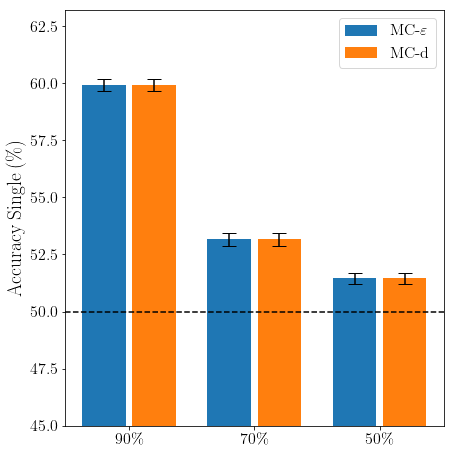

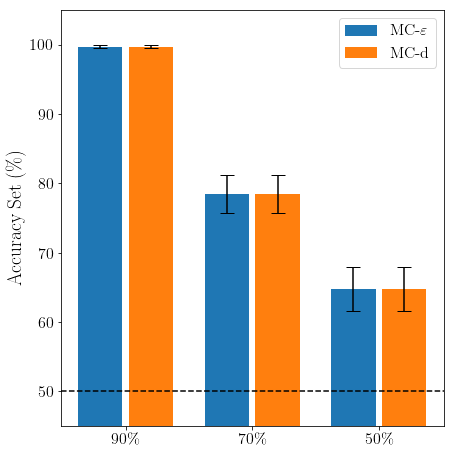

In [40]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16})

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

names = ['90\%', '70\%', '50\%']
N = len(names)
ind = np.arange(N)

pca_perc_dropout_opt = pca_perc_dropout[pca_perc_dropout.percentile == -1]*100
pca_perc_dropout_50_opt = pca_perc_dropout_50[pca_perc_dropout_50.percentile == -1]*100
pca_cat_opt_perc_td = pca_cat_opt_perc*100

offset = 0.2
width = 0.35

y = [pca_cat_opt_perc_td.mc_attack_eps_50.mean(), 
     pca_perc_dropout_opt.mc_attack_eps_50.mean(),
     pca_perc_dropout_50_opt.mc_attack_eps_50.mean()]

rects1 = ax.bar(ind-offset,  y, width=width, label='MC-$\\varepsilon$')

e = [calc_error(pca_cat_opt_perc_td.mc_attack_eps_50),
     calc_error(pca_perc_dropout_opt.mc_attack_eps_50),
     calc_error(pca_perc_dropout_50_opt.mc_attack_eps_50)]

plt.errorbar(ind-offset, y, e, color='k', linestyle='None', capsize=7)

y = [pca_cat_opt_perc_td.mc_attack_log_50.mean(), 
     pca_perc_dropout_opt.mc_attack_log_50.mean(),
     pca_perc_dropout_50_opt.mc_attack_log_50.mean()]

rects1 = ax.bar(ind+offset,  y, width=width, label='MC-d')

e = [calc_error(pca_cat_opt_perc_td.mc_attack_log_50),
     calc_error(pca_perc_dropout_opt.mc_attack_log_50),
     calc_error(pca_perc_dropout_50_opt.mc_attack_log_50)]

plt.errorbar(ind+offset, y, e, color='k', linestyle='None', capsize=7)

plt.ylim(ymin=45)
plt.axhline(y=50, color='k', linestyle='--')

plt.ylabel('Accuracy Single (\%)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='0')

ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('VAE_Dropout_Single.pgf', bbox_inches="tight")

plt.legend()
plt.show()

#####################################################################################
f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

N = len(names)
ind = np.arange(N)

offset = 0.2
width = 0.35

y = [pca_cat_opt_perc_td.set_accuracy_mc_ones.mean(), 
     pca_perc_dropout_opt.set_accuracy_mc_ones.mean(),
     pca_perc_dropout_50_opt.set_accuracy_mc_ones.mean()]

rects1 = ax.bar(ind-offset,  y, width=width, label='MC-$\\varepsilon$')

e = [calc_error(pca_cat_opt_perc_td.set_accuracy_mc_ones),
     calc_error(pca_perc_dropout_opt.set_accuracy_mc_ones),
     calc_error(pca_perc_dropout_50_opt.set_accuracy_mc_ones)]

plt.errorbar(ind-offset, y, e, color='k', linestyle='None', capsize=7)

y = [pca_cat_opt_perc_td.set_accuracy_mc_log.mean(), 
     pca_perc_dropout_opt.set_accuracy_mc_log.mean(),
     pca_perc_dropout_50_opt.set_accuracy_mc_log.mean()]

rects1 = ax.bar(ind+offset,  y, width=width, label='MC-d')

e = [calc_error(pca_cat_opt_perc_td.set_accuracy_mc_log),
     calc_error(pca_perc_dropout_opt.set_accuracy_mc_log),
     calc_error(pca_perc_dropout_50_opt.set_accuracy_mc_log)]

plt.errorbar(ind+offset, y, e, color='k', linestyle='None', capsize=7)

plt.ylim(ymin=45)
plt.axhline(y=50, color='k', linestyle='--')

plt.ylabel('Accuracy Set (\%)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='0')

ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('VAE_Dropout_Set.pgf', bbox_inches="tight")

plt.legend()
plt.show()

In [41]:
def calc_means_std(col_names, dataset, crit):
    dataset = dataset.groupby([crit])
    means = dataset.mean()[col_names]
    std = dataset.std()[col_names]
    lens = np.sqrt(dataset.count()[col_names])
    return means, std/ lens

In [42]:
rec_attack_plot = rec_attack.assign(keep_rate_dropout = 0.9)
rec_perc_dropout = rec_perc_dropout.assign(keep_rate_dropout = 0.7)
rec_perc_dropout_50 = rec_perc_dropout_50.assign(keep_rate_dropout = 0.5)
merged = pd.concat((rec_attack_plot, rec_perc_dropout, rec_perc_dropout_50))*100

means_single, std_single = calc_means_std(['mc_attack_eps_50'], merged, 'keep_rate_dropout')
means_set, std_set = calc_means_std(['set_accuracy_mc_ones'], merged, 'keep_rate_dropout')

res = means_single['mc_attack_eps_50'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_single['mc_attack_eps_50'].map(lambda x: "{:.2f}".format(x)) + ' & '+ means_set['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_set['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'\\\\'
for i in range(len(res.values)):
    print(res.values[i])

53.77$\pm$0.34 & 86.00$\pm$3.18\\
58.31$\pm$0.40 & 97.00$\pm$1.56\\
70.09$\pm$0.37 & 100.00$\pm$0.00\\


In [43]:
pca_cat_opt_perc_td = pca_cat_opt_perc_td.assign(keep_rate_dropout = 0.9)
pca_perc_dropout_opt = pca_perc_dropout_opt.assign(keep_rate_dropout = 0.7)
pca_perc_dropout_50_opt = pca_perc_dropout_50_opt.assign(keep_rate_dropout = 0.5)
merged = pd.concat((pca_cat_opt_perc_td, pca_perc_dropout_opt, pca_perc_dropout_50_opt))

means_single, std_single = calc_means_std(['mc_attack_eps_50'], merged, 'keep_rate_dropout')
means_set, std_set = calc_means_std(['set_accuracy_mc_ones'], merged, 'keep_rate_dropout')

res = means_single['mc_attack_eps_50'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_single['mc_attack_eps_50'].map(lambda x: "{:.2f}".format(x)) + ' & '+ means_set['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_set['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'\\\\'
for i in range(len(res.values)):
    print(res.values[i])

51.45$\pm$0.26 & 64.75$\pm$3.19\\
53.17$\pm$0.29 & 78.50$\pm$2.71\\
59.93$\pm$0.26 & 99.75$\pm$0.25\\


In [44]:
merged.groupby(['keep_rate_dropout']).mean()

,ais_50,ais_acc_rate_50,exp_no,instance_no,mc_attack_eps,mc_attack_eps_50,mc_attack_frac,mc_attack_frac_50,mc_attack_log,mc_attack_log_50,...,set_accuracy_mc_log,set_accuracy_mc_ones,set_accuracy_wb,set_mem_inf_adv_ais,set_mem_inf_adv_mc_log,set_mem_inf_adv_mc_ones,set_mem_inf_adv_wb,sigma_ais,white_box_11,white_box_50
keep_rate_dropout,,,,,,,,,,,,,,,,,,,,,
0.5,0.0,0.0,200,461960,9.11760,51.450,9.12870,51.450,9.2238,51.450,...,64.75,64.75,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
0.7,0.0,0.0,200,411980,10.03930,53.175,10.07285,53.175,10.1514,53.175,...,78.50,78.50,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
0.9,0.0,0.0,200,506780,9.77465,59.930,9.76650,59.930,9.8476,59.930,...,99.75,99.75,0.0,-100.0,99.5,99.5,-100.0,0.0,0.0,0.0


In [45]:
merged.sort_values(by=['keep_rate_dropout'])

,ais_50,ais_acc_rate_50,exp_no,instance_no,keep_rate_dropout,mc_attack_eps,mc_attack_eps_50,mc_attack_frac,mc_attack_frac_50,mc_attack_log,...,set_accuracy_mc_log,set_accuracy_mc_ones,set_accuracy_wb,set_mem_inf_adv_ais,set_mem_inf_adv_mc_log,set_mem_inf_adv_mc_ones,set_mem_inf_adv_wb,sigma_ais,white_box_11,white_box_50
999,0.0,0.0,400,89200,0.5,6.65,50.0,6.65,50.0,5.63,...,50.0,50.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
359,0.0,0.0,0,369000,0.5,11.17,53.0,11.17,53.0,10.90,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
354,0.0,0.0,0,369000,0.5,16.86,56.0,16.86,56.0,16.86,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
349,0.0,0.0,400,340200,0.5,10.18,57.0,10.19,57.0,9.34,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
344,0.0,0.0,400,340200,0.5,11.37,47.0,11.37,47.0,11.80,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
339,0.0,0.0,300,340200,0.5,10.53,53.0,10.53,53.0,11.52,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
334,0.0,0.0,300,340200,0.5,13.69,59.0,13.69,59.0,12.78,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
329,0.0,0.0,200,340200,0.5,11.53,50.0,11.53,50.0,12.33,...,50.0,50.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
324,0.0,0.0,200,340200,0.5,5.87,50.0,5.87,50.0,6.42,...,50.0,50.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
319,0.0,0.0,100,340200,0.5,9.14,53.0,9.27,53.0,9.34,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [46]:
res = None
cols = (calc_line('set_accuracy_mc_ones', pca_cat_opt_perc_td, pca_perc_dropout_opt, pca_perc_dropout_50_opt),
calc_line('set_accuracy_mc_log', pca_cat_opt_perc_td, pca_perc_dropout_opt, pca_perc_dropout_50_opt))
for i in range(len(cols)):
    means = cols[i][0]
    std = cols[i][1]
    if res is None:
        res = (means.map(lambda x: "{:.2f}".format(x))+'$\pm$'+std.map(lambda x: "{:.2f}".format(x))).values
#    elif i == len(cols)-1:
#        res = res + means.map(lambda x: "{:.2f}".format(x))+'$\pm$'+std.map(lambda x: "{:.2f}".format(x))+' & '
#    else:
#        res = res + means.map(lambda x: "{:.2f}".format(x))+'$\pm$'+std.map(lambda x: "{:.2f}".format(x))+' \\ '
res.values

NameError: name 'calc_line' is not defined

In [ ]:
def format_as_line(means, std):
    return means.map(lambda x: "{:.2f}".format(x))+'$\pm$'+std.map(lambda x: "{:.2f}".format(x))

# Bagging

In [ ]:
bagging = pd.DataFrame(np.loadtxt('Bagging.csv', dtype=dt))

bagging = bagging.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
bagging = bagging.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0:
            prob[i] = 1
        elif x[i] == 0:
            prob[i] = 0.5
        elif x[i] < 0:
            prob[i] = 0
    return prob

bagging = bagging.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
bagging = bagging.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))

In [ ]:
bagging.groupby(['method']).mean()

In [ ]:
bagging_data = np.vstack((bagging[bagging.method == 4]['mc_attack_eps_50'].values,bagging[bagging.method == 5]['mc_attack_eps_50'].values,bagging[bagging.method == 9]['mc_attack_eps_50'].values))*100
bagging_data_set = np.vstack((bagging[bagging.method == 4]['set_accuracy_mc_ones'].values,bagging[bagging.method == 5]['set_accuracy_mc_ones'].values,bagging[bagging.method == 9]['set_accuracy_mc_ones'].values))*100
bagging_data_set

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

f = plt.figure(figsize=(14, 6))
ax = plt.subplot()

add_identity(ax, color='k', ls='--')

plt.scatter(bagging_data[2], bagging_data[1], linewidth=2, label='PCA based', marker='x')
plt.scatter(bagging_data[2], bagging_data[0], linewidth=2, label='HOG based', marker='x')
#plt.scatter(data_best_perc.mem_inf_adv_wb, data_best_perc.mem_inf_adv_bb, color='C3', linewidth=2, label='Black-Box-Angriff')

plt.xlabel('Accuracy Bagging (\\%)', fontsize='large')
plt.ylabel('Accuracy (\\%)', fontsize='large')

plt.grid(True)
plt.legend()

plt.tight_layout(w_pad=1)

plt.savefig('Scatter_Bagging.pgf', bbox_inches="tight")

In [ ]:
print(str(np.round(bagging[bagging.method == 4]['mc_attack_eps_50'].mean()*100,2))+'$\pm$'+str(np.round(bagging[bagging.method == 4]['mc_attack_eps_50'].std()*100/np.sqrt(len(bagging[bagging.method == 4]['mc_attack_eps_50'])),2)))
print(str(np.round(bagging[bagging.method == 5]['mc_attack_eps_50'].mean()*100,2))+'$\pm$'+str(np.round(bagging[bagging.method == 5]['mc_attack_eps_50'].std()*100/np.sqrt(len(bagging[bagging.method == 5]['mc_attack_eps_50'])),2)))
print(str(np.round(bagging[bagging.method == 9]['mc_attack_eps_50'].mean()*100,2))+'$\pm$'+str(np.round(bagging[bagging.method == 9]['mc_attack_eps_50'].std()*100/np.sqrt(len(bagging[bagging.method == 9]['mc_attack_eps_50'])),2)))

In [ ]:
print(str(np.round(bagging[bagging.method == 4]['set_accuracy_mc_ones'].mean()*100,2))+'$\pm$'+str(np.round(bagging[bagging.method == 4]['set_accuracy_mc_ones'].std()*100/np.sqrt(len(bagging[bagging.method == 4]['set_accuracy_mc_ones'])),2)))
print(str(np.round(bagging[bagging.method == 5]['set_accuracy_mc_ones'].mean()*100,2))+'$\pm$'+str(np.round(bagging[bagging.method == 5]['set_accuracy_mc_ones'].std()*100/np.sqrt(len(bagging[bagging.method == 5]['set_accuracy_mc_ones'])),2)))
print(str(np.round(bagging[bagging.method == 9]['set_accuracy_mc_ones'].mean()*100,2))+'$\pm$'+str(np.round(bagging[bagging.method == 9]['set_accuracy_mc_ones'].std()*100/np.sqrt(len(bagging[bagging.method == 9]['set_accuracy_mc_ones'])),2)))